In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = np.arange(10)

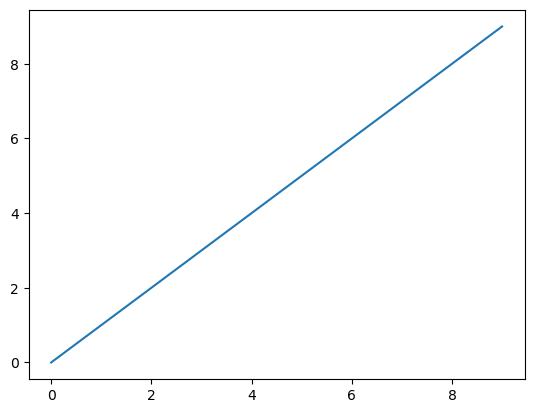

In [3]:
plt.plot(data)

#### Multiple Subplots example

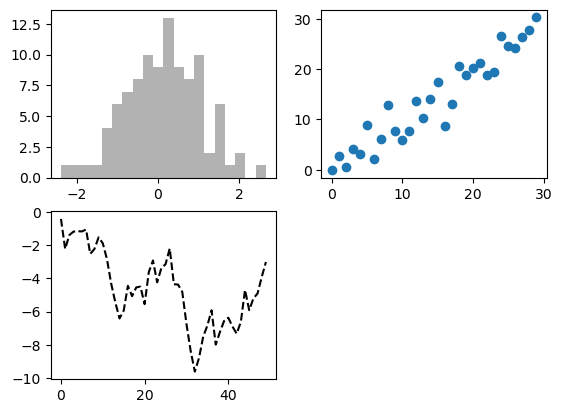

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.hist(
    np.random.standard_normal(100),
    bins=20,
    color="black",
    alpha=0.3
);

ax2.scatter(
    np.arange(30),
    np.arange(30) + 3 * np.random.standard_normal(30)
);

ax3.plot(
    np.random.standard_normal(50).cumsum(),
    color="black",
    linestyle="dashed"
);

In [5]:
type(ax1)

matplotlib.axes._subplots.AxesSubplot

- notice how the cell below does not plot anything, there is no Figure object for this plot

In [6]:
ax3.plot(
    np.random.standard_normal(50).cumsum(),
    color="black",
    linestyle="dashed"
)

#### Spacing example

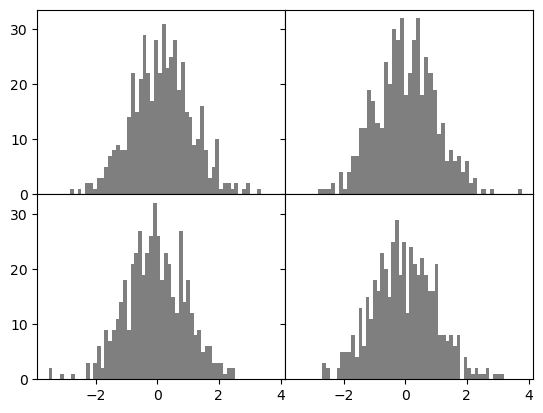

In [7]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

#### Linestyles example

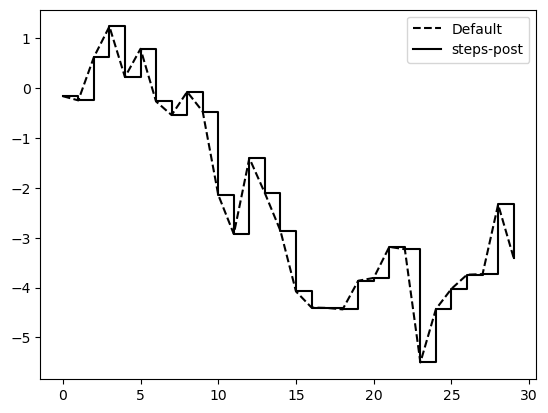

In [8]:
fig = plt.figure()

ax = fig.add_subplot()

data = np.random.standard_normal(30).cumsum()

ax.plot(
    data,
    color="black",
    linestyle="dashed",
    label="Default"
);
ax.plot(
    data,
    color="black",
    drawstyle="steps-post",
    label="steps-post");
ax.legend();

#### Ticks, Labels, and Legends example

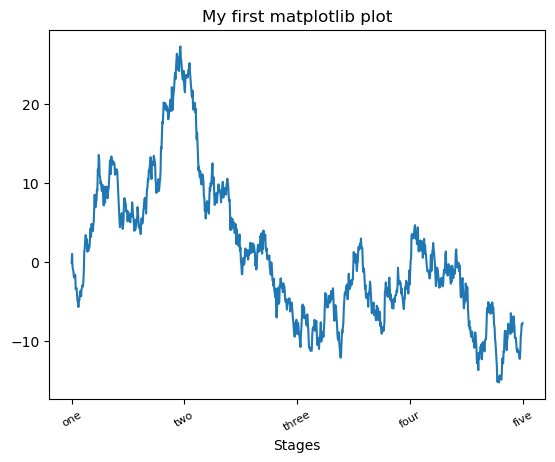

In [9]:
fig, ax = plt.subplots()

ax.plot(np.random.standard_normal(1000).cumsum());

ticks = ax.set_xticks([0, 250, 500, 750, 1000])

labels = ax.set_xticklabels(
    ["one", "two", "three", "four", "five"],
    rotation=30,
    fontsize=8
)

ax.set_xlabel("Stages")

ax.set_title("My first matplotlib plot");

#### Annotations Example

Text(0.5, 1.0, 'Important dates in the 2008–2009 financial crisis')

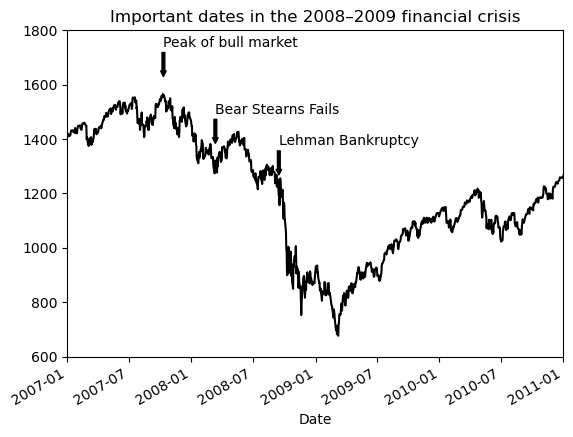

In [10]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008–2009 financial crisis")

#### pandas DataFrame `plot()` method example

<AxesSubplot:>

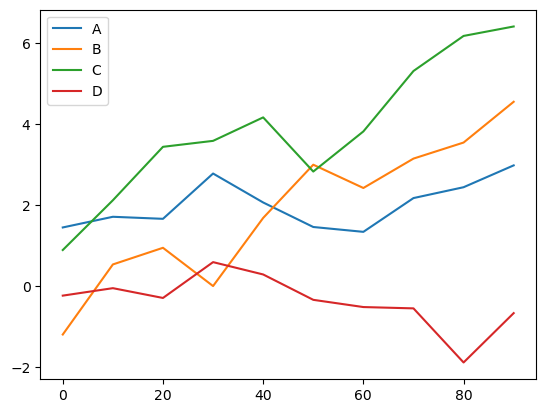

In [11]:
df = pd.DataFrame(
    np.random.standard_normal((10, 4)).cumsum(0),
    columns=["A", "B", "C", "D"],
    index=np.arange(0, 100, 10)
)

df.plot()

#### Bar Plot example

In [12]:
df = pd.DataFrame(
    np.random.uniform(size=(6, 4)),
    index=["one", "two", "three", "four", "five", "six"],
    columns=pd.Index(
        ["A", "B", "C", "D"],
        name="Genus"
    )
)

df

Genus,A,B,C,D
one,0.592824,0.828041,0.721761,0.016463
two,0.855136,0.959431,0.323800,0.695405
three,0.597665,0.061395,0.538296,0.632869
four,0.819864,0.058396,0.374379,0.676505
five,0.143261,0.540273,0.683124,0.158353
six,0.791605,0.465987,0.371869,0.953207


<AxesSubplot:>

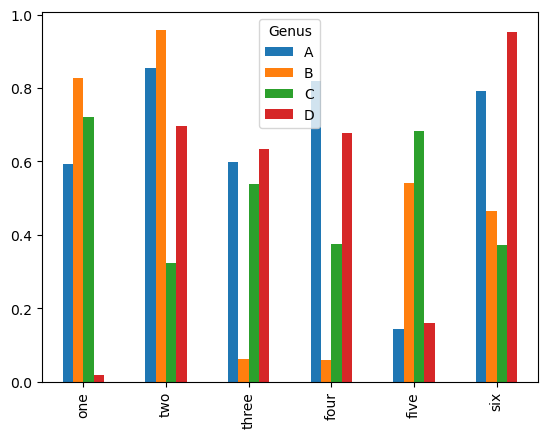

In [13]:
df.plot.bar()

<AxesSubplot:>

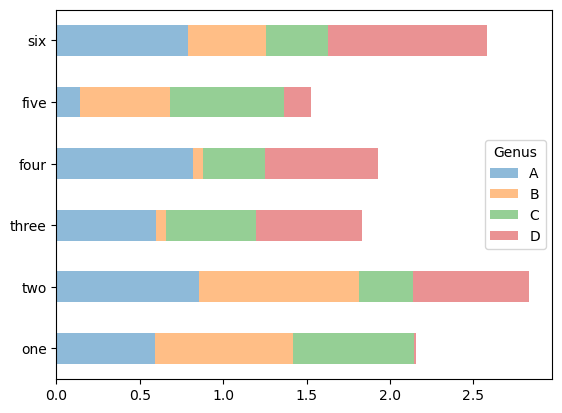

In [14]:
df.plot.barh(stacked=True, alpha=0.5)

In [15]:
tips = pd.read_csv("examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [16]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])

party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [17]:
# not many one or six person parties so here they are removed
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [18]:
# normalize so that each row sums to 1
party_pcts = party_counts.div(
    party_counts.sum(axis="columns"),
    axis="index"
)
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<AxesSubplot:xlabel='day'>

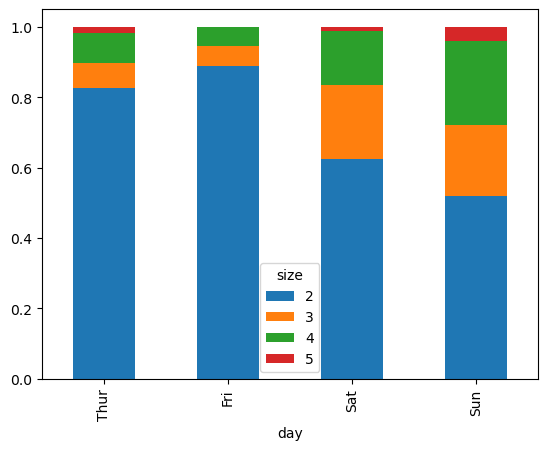

In [19]:
party_pcts.plot.bar(stacked=True)

#### seaborn example

In [20]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])

tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

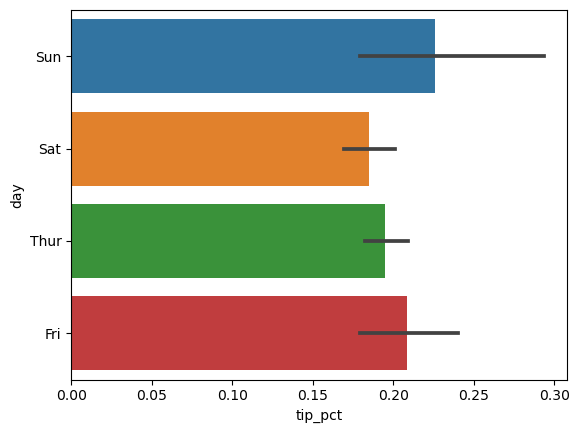

In [21]:
# notice here that seaborn knows to plot the average tip_pct per day as opposed to
# individual data points of tip_pct
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

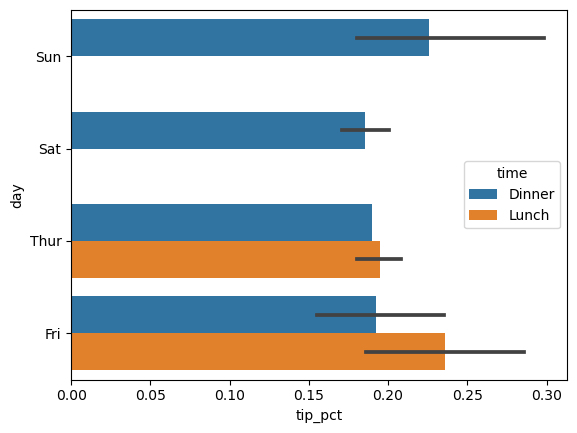

In [22]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

#### Histogram example

In [26]:
sns.set_palette("Greys_r")
sns.set_style("whitegrid")

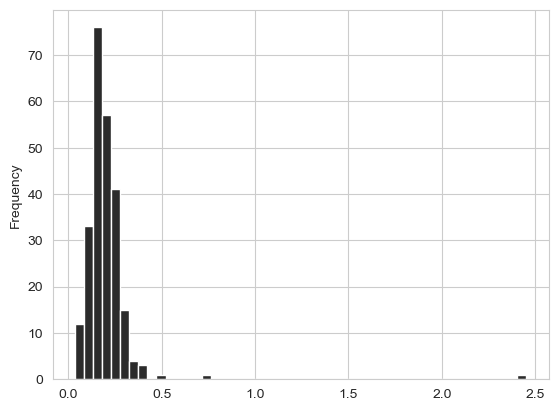

In [28]:
ax = tips["tip_pct"].plot.hist(bins=50)

In [31]:
xlim_hist = ax.get_xlim()

<AxesSubplot:ylabel='Density'>

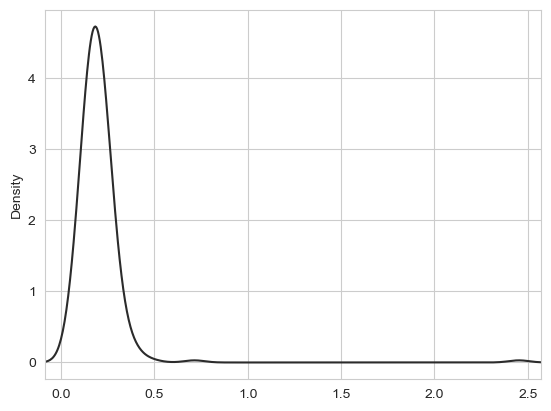

In [32]:
tips["tip_pct"].plot.density(xlim=xlim_hist)

#### Scatter Plot Matrix example

In [34]:
macro = pd.read_csv("examples/macrodata.csv")

data = macro[["cpi", "m1", "tbilrate", "unemp"]]

trans_data = np.log(data).diff().dropna()

trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


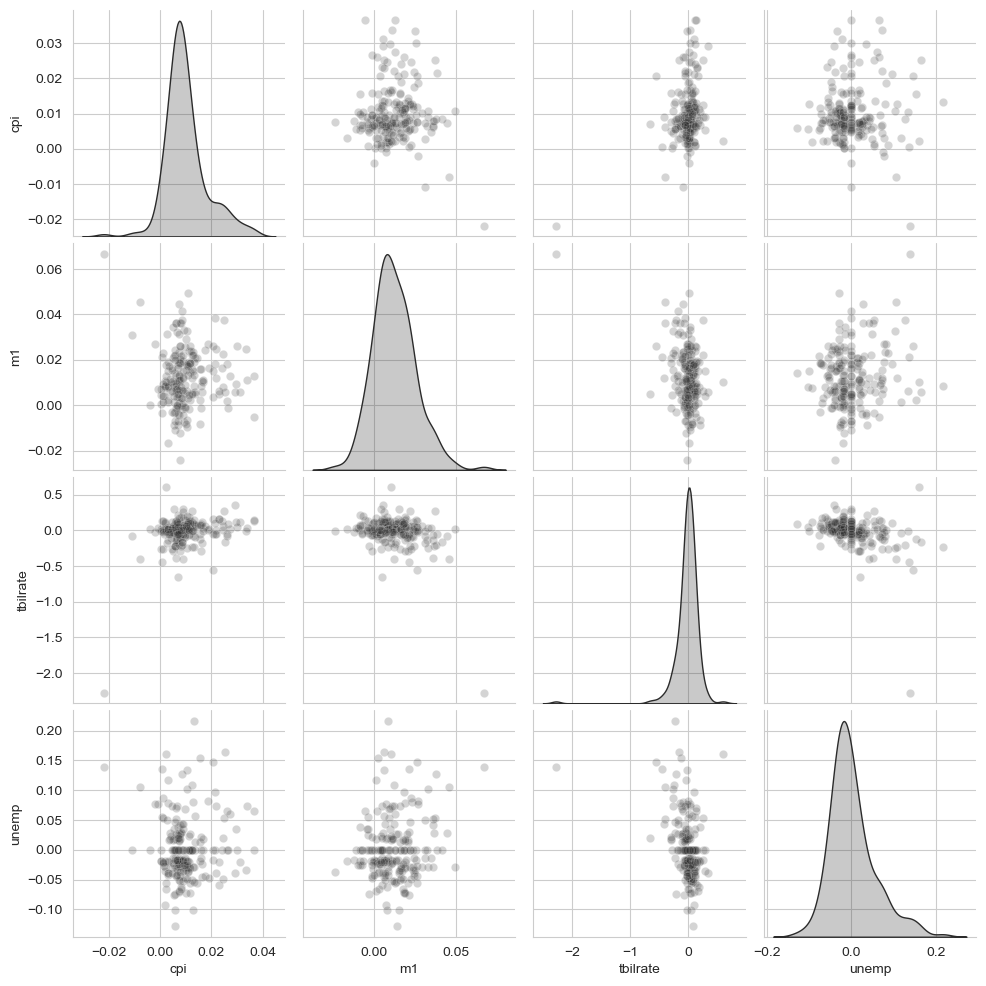

In [35]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

#### Facet Grids example

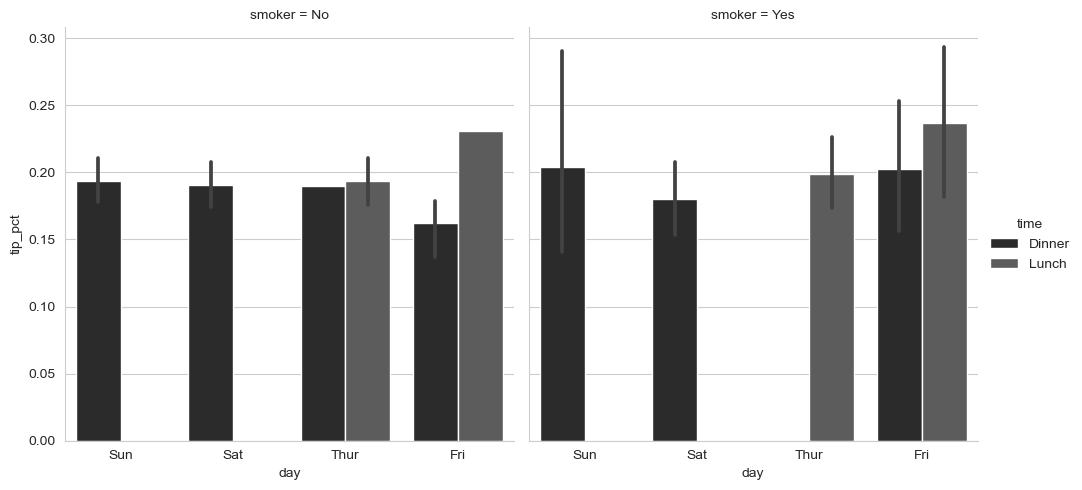

In [36]:
sns.catplot(
    x="day",
    y="tip_pct",
    hue="time",
    col="smoker",
    kind="bar",
    data=tips[tips.tip_pct < 1]
)